<a href="https://colab.research.google.com/github/cechieh1/DSI/blob/main/groupchallengewk14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we are going to predict whether patients have diabetes or not based on features like blood pressure, BMI, age etc.  
# Loading necessary packages and our data

In this task I am asked to reproduce a diabetes prediction, for which I have downloaded a dataset from kaggle.com.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
sns.set(rc={'figure.figsize':(11.7,8.27)})

Uploading the downloaded csv file

In [8]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


Uploading the dataset to dataframe

In [9]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
#filename = "https://github.com/cechieh1/DSI/blob/main/diabetes.csv"
# uploading the dataset from my github
#df = pd.read_csv(filename)

ParserError: ignored

# Getting to know our dataset

In [9]:
df2.shape

(768, 9)

In [10]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All of our features are numeric so there is no need for dealing with categorical features.

In [13]:
print(f'number of duplicate rows: {df2.duplicated().sum()}\nnumber of null values:\n{df2.isna().sum()}')

number of duplicate rows: 0
number of null values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Fortunately, there are no null or duplicate values in our dataset so we can continue.

## Exploratotry Data Analysis(EDA)

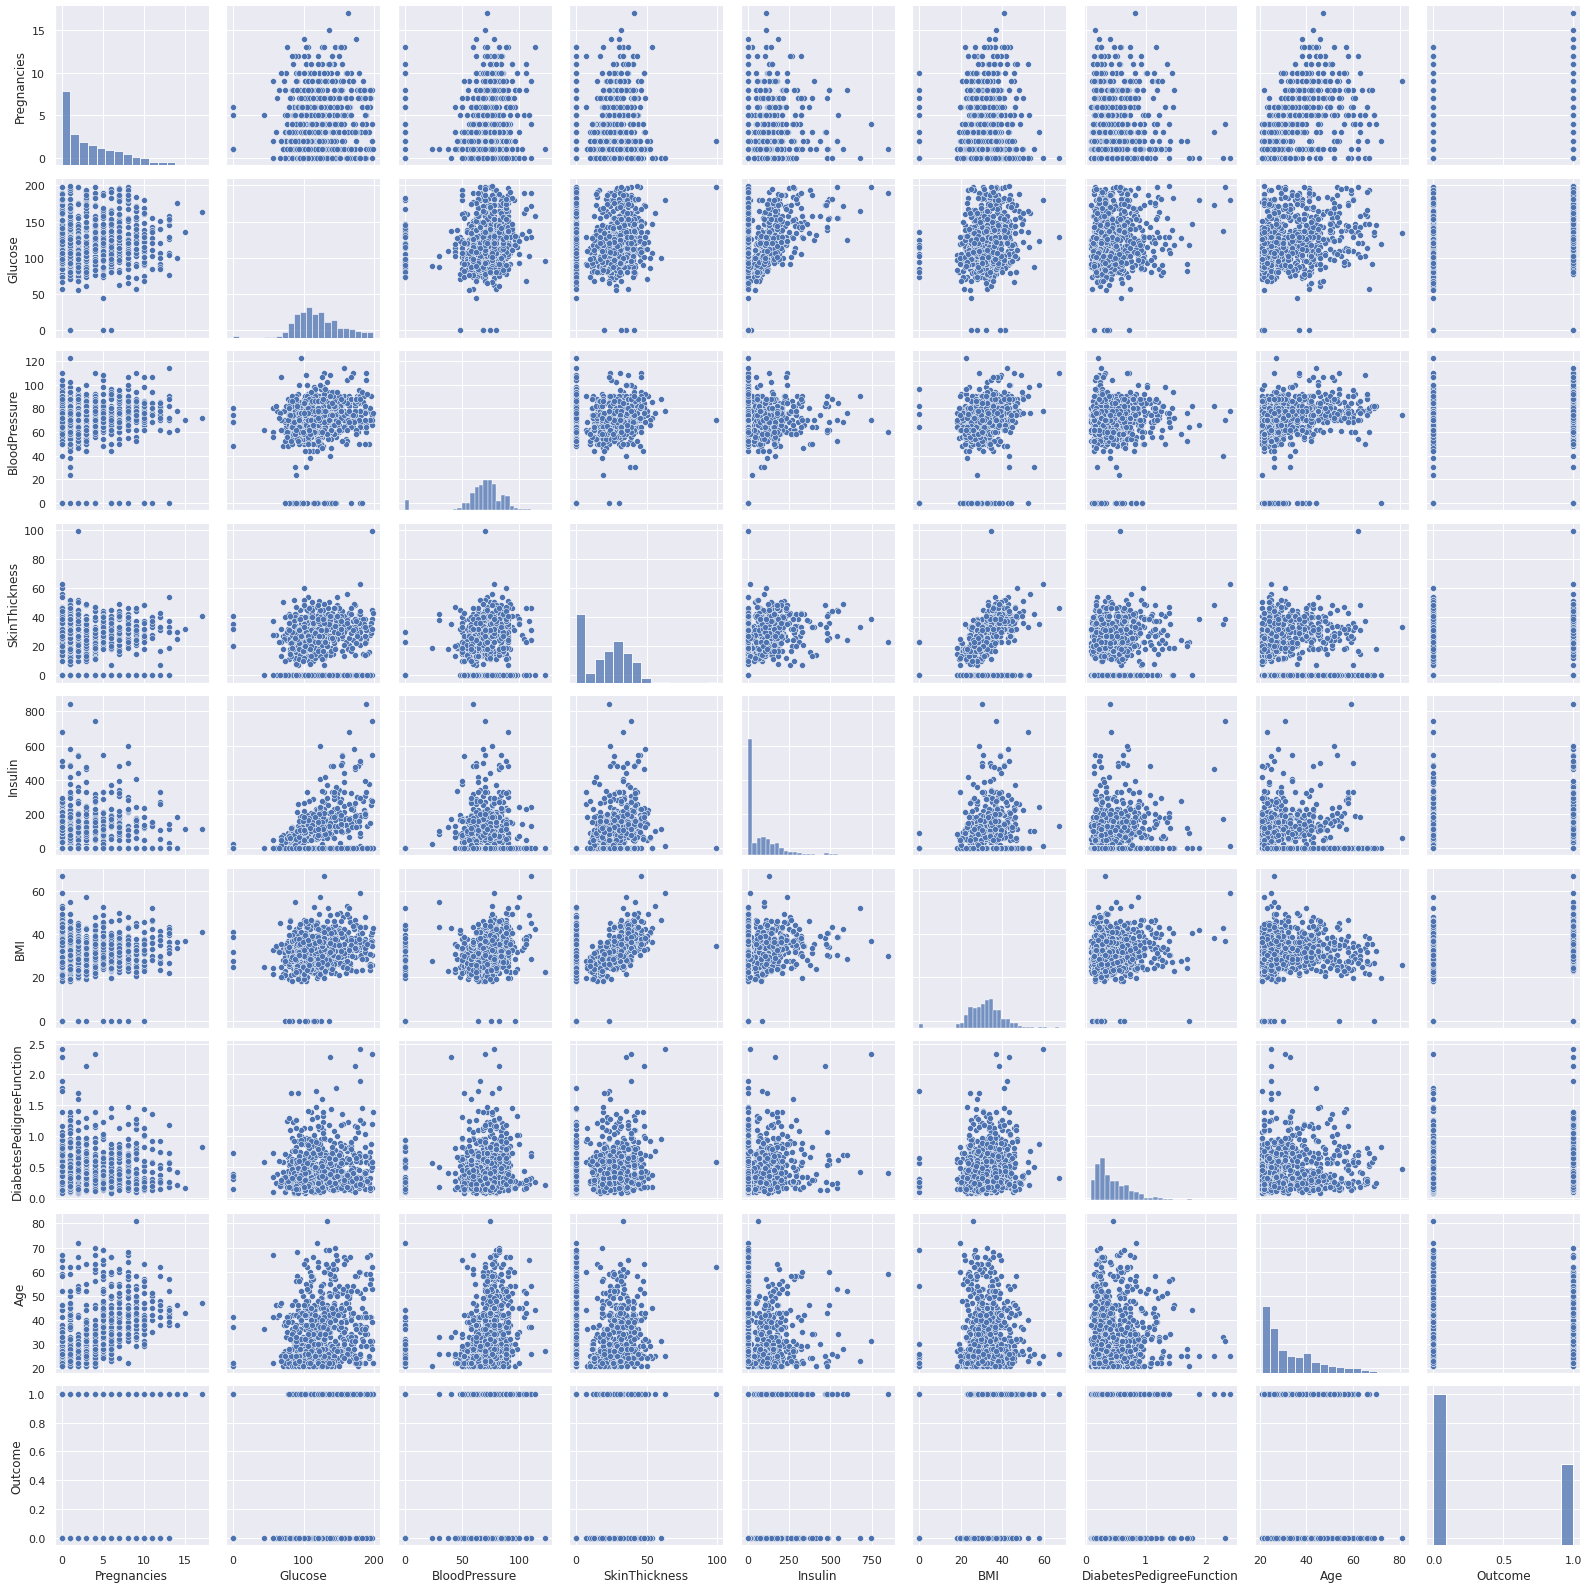

In [14]:
sns.pairplot(df2,palette = ["#8000ff","#da8829"])

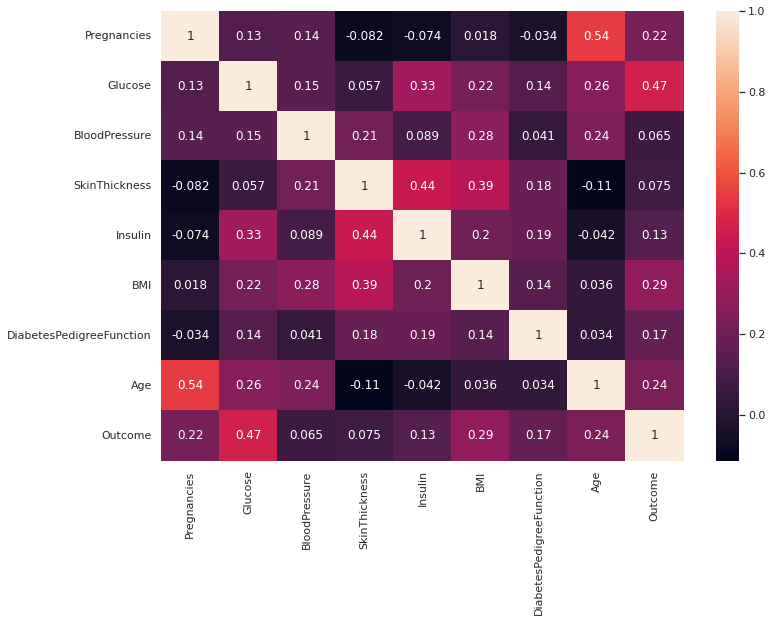

In [15]:
sns.heatmap(df2.corr(),annot=True)

There seems to be a negative correlation of skin thickness and insulin with pegnancies. It also seems there is apositive correlation of pregnancies with age, followed by glucose and outcome. 
A closer analyses of the relationshp between outcome and glucose may yeild further information.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


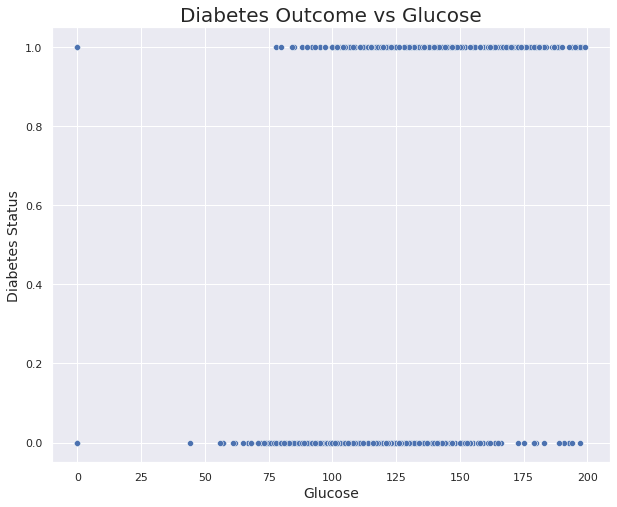

In [10]:
# Relationship of pregnancies with age
plt.figure(figsize=(10,8))

x = df2['Glucose'].values
y = df2['Outcome'].values
sns.scatterplot(x,y)
plt.title('Diabetes Outcome vs Glucose',fontsize=20)
plt.xlabel('Glucose',fontsize=14)
plt.ylabel('Diabetes Status',fontsize=14)
plt.show()


There are only 2 possible outcomes: having diabetes and not having diabetes.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


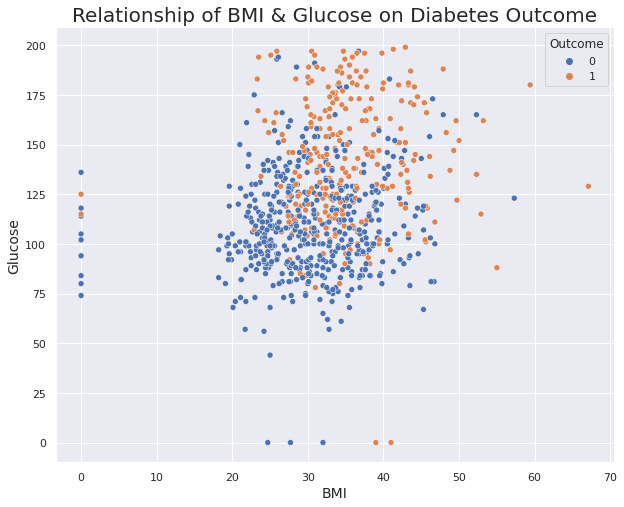

In [12]:
# scatterplot of pregnancies with age
plt.figure(figsize=(10,8))

x = df2['BMI'].values
y = df2['Glucose'].values
color = df2['Outcome']

sns.scatterplot(x,y,hue=color)
plt.title('Relationship of BMI & Glucose on Diabetes Outcome',fontsize=20)
plt.xlabel('BMI',fontsize=14)
plt.ylabel('Glucose',fontsize=14)
plt.show()


interpretation of the above graph can be mean that there is a direct relationship between higher levels of BMI and glucose with outcome 1 of diabetes

# Modeling  
First of all, we split our dataset into a training and a test dataset.

In [16]:
data = df2.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

Here we are going to define all of our models:

In [17]:
lr_model = LogisticRegression(max_iter = 10000)
ridge_model = RidgeClassifier()
ridgecv_model = RidgeClassifierCV()
gpc = GaussianProcessClassifier()
tr = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
rf = RandomForestClassifier(max_depth=2)

The model_metrics function below returns useful metrics such as accuracy and f1_score in a dictionary format for each model.

In [18]:
def model_metrics(model, X_test, y_test, decimals = 5):
    import numpy as np
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = np.round(accuracy_score(y_test, y_pred),decimals)
    pre = np.round(precision_score(y_test, y_pred),decimals)
    rec = np.round(recall_score(y_test, y_pred),decimals)
    f1 = np.round(f1_score(y_test, y_pred),decimals)
    auc = np.round(roc_auc_score(y_test, y_pred),decimals)
    return {'accuracy': acc, 'precision': pre, 'recall': rec, 'f1_score': f1, 'auc': auc}

We combine the metrics for our models into a dataframe:

In [19]:
results = pd.DataFrame(
    [
        model_metrics(lr_model, X_test, y_test),
        model_metrics(ridge_model, X_test, y_test),
        model_metrics(ridgecv_model, X_test, y_test),
        model_metrics(gpc, X_test, y_test),
        model_metrics(tr, X_test, y_test),
        model_metrics(knn, X_test, y_test),
        model_metrics(svc, X_test, y_test),
        model_metrics(rf, X_test, y_test)
    ], 
    index = ['LogisticRegression', 'RidgeClassifier', 'RidgeClassifierCV', 'GaussianProcessClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SupportVectorClassification', 'RandomForestClassifier']) \
.reset_index() \
.rename(columns={'index':'model'})

## Model Selection  
Now, Let's see which of our models has performed better!

In [20]:
results.sort_values(['accuracy', 'f1_score', 'auc'],
              ascending = [False, False, False])

,model,accuracy,precision,recall,f1_score,auc
1,RidgeClassifier,0.83117,0.78378,0.61702,0.69048,0.77113
0,LogisticRegression,0.82468,0.76316,0.61702,0.68235,0.76645
2,RidgeClassifierCV,0.82468,0.76316,0.61702,0.68235,0.76645
6,SupportVectorClassification,0.79221,0.70270,0.55319,0.61905,0.72519
7,RandomForestClassifier,0.79221,0.75862,0.46809,0.57895,0.70133
4,DecisionTreeClassifier,0.77273,0.61111,0.70213,0.65347,0.75293
5,KNeighborsClassifier,0.72078,0.53846,0.59574,0.56566,0.68572
3,GaussianProcessClassifier,0.61688,0.38889,0.44681,0.41584,0.56920


Let's visualize the performance of our models:

Text(0.5, 1.0, 'Model Performance based on Accuracy')

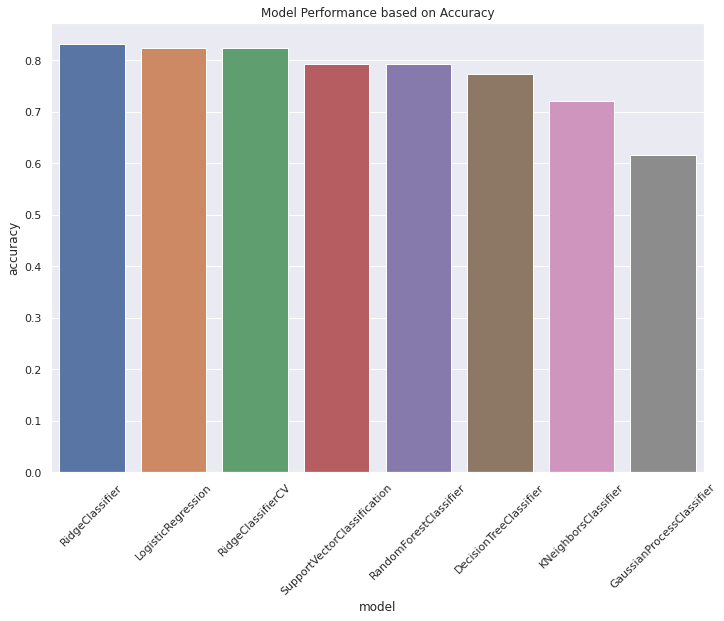

In [21]:
results = results.sort_values('accuracy', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['accuracy']).set_title('Model Performance based on Accuracy')

Text(0.5, 1.0, 'Model Performance based on the f1_score')

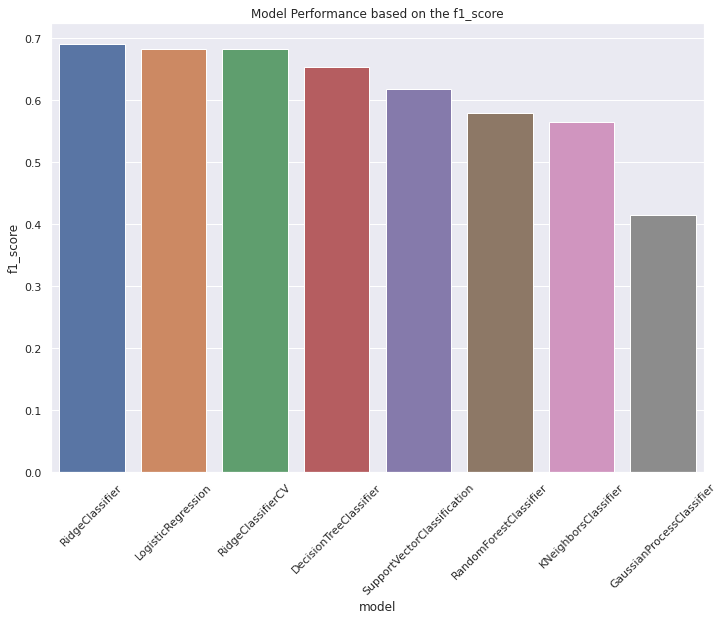

In [22]:
results = results.sort_values('f1_score', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['f1_score']).set_title('Model Performance based on the f1_score')

Text(0.5, 1.0, 'Model Performance based on AUC(Area Under Curve)')

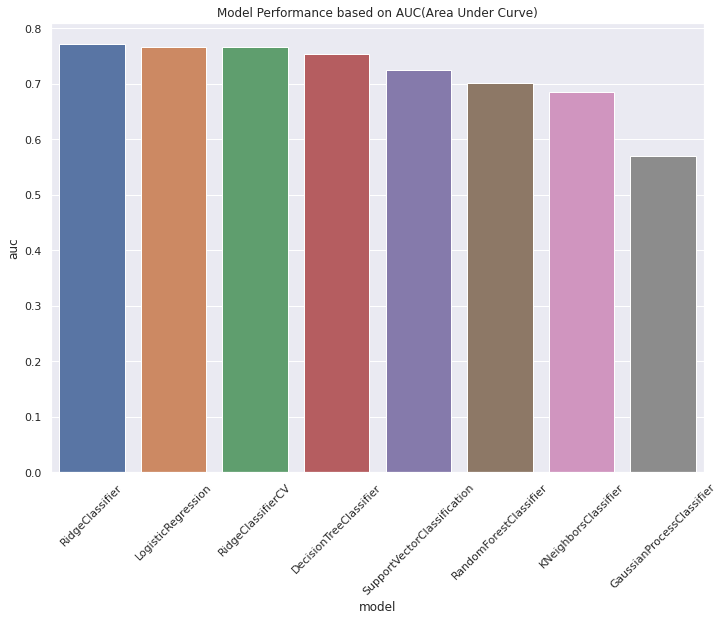

In [23]:
results = results.sort_values('auc', ascending = False)
plt.xticks(rotation=45)
sns.barplot(x = results['model'], y=results['auc']).set_title('Model Performance based on AUC(Area Under Curve)')

# Conclusion and future projects  
It appears that with the conditions we had for our modeling process, the RidgeClassifier has performed better than the others in terms of accuracy, f1_score and also AUC, so we can say that in this situation the RidgeClassifier is the best model. However, the performance of our mdoels does depend on the random_state argument in our data splitting section and the results could change if we had a different value for it.  

In future projects we could do a little more EDA(Exploratory Data Analysis) on our dataset to get to know the relationships between the variables better. We could also try using a Neural Network for classifying the patients and see how our performance holds up. Also trying to optimize the performance of our current models by adjusting their arguments could be valuable as well!

I would greatly appreciate it if you could upvote this notebook and also take a look at [my other notebooks](https://www.kaggle.com/hosseinfaridnasr/code).